In [125]:
!pip install -U scikit-learn scipy matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [150]:
! pip install tabulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
upload=files.upload()

Saving nyc_data_after_EDA.csv to nyc_data_after_EDA.csv


# Imports

In [190]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

#OS services
import os

#Save file
#from sb_utils import save_file

#Natural language toolkit
import nltk
import nltk.corpus
from nltk.stem import LancasterStemmer

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

#Suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import plotly as plotly
import plotly.express as px
from plotly import __version__
from plotly import tools
import plotly.graph_objs as go
import plotly.offline as py 
from plotly.offline import init_notebook_mode, plot 
init_notebook_mode(connected=True)

# Set default font size
plt.rcParams['font.size'] = 24
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Imputing missing values and scaling values
#from sklearn.preprocessing import Imputer, MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
#imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

#Train, test, split
from sklearn.model_selection import train_test_split

# Machine Learning Models
#from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import xgboost

# Evaluation of model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#Statistical function
from scipy.stats import norm
from tabulate import tabulate

#Miscellaneous
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from IPython.display import Image as PImage

### Load in the Data

In [127]:
nyc_data_modeling=pd.read_csv('/content/nyc_data_after_EDA.csv')
nyc_data_modeling.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0


In [ ]:
#test = nyc_data_modeling['neighbourhood_group'] == 'Queens'
#test.head()

0    True
1    True
2    True
3    True
4    True
Name: neighbourhood_group, dtype: bool

In [128]:
nyc_data_modeling.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0


### Data Types and Missing Values

In [129]:
nyc_data_modeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [130]:
nyc_data_modeling.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [131]:
nyc_data_modeling.shape

(48895, 16)

### Drop Columns

In [132]:
#nyc_data_modeling.drop(['id', 'name', 'host_name', 'last_review', 'reviews_per_month'], axis=1, inplace=True)
nyc_data_modeling.drop(['id', 'name', 'host_name', 'last_review'], axis=1, inplace=True)

#nyc_data_modeling.drop(["host_id"], axis = 1, inplace = True)

#Indexing
nyc_data_modeling.drop(nyc_data_modeling[nyc_data_modeling['price'] == 0 ].index , inplace=True)
nyc_data_modeling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48884 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48884 non-null  int64  
 1   neighbourhood_group             48884 non-null  object 
 2   neighbourhood                   48884 non-null  object 
 3   latitude                        48884 non-null  float64
 4   longitude                       48884 non-null  float64
 5   room_type                       48884 non-null  object 
 6   price                           48884 non-null  int64  
 7   minimum_nights                  48884 non-null  int64  
 8   number_of_reviews               48884 non-null  int64  
 9   reviews_per_month               48884 non-null  float64
 10  calculated_host_listings_count  48884 non-null  int64  
 11  availability_365                48884 non-null  int64  
dtypes: float64(3), int64(6), object(

In [133]:
nyc_data_modeling.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:
dataset_new1 = pd.get_dummies(nyc_data_modeling, columns=['neighbourhood_group', 'room_type'], prefix = ['ng', 'rt'], drop_first = True)
dataset_new1.shape

(48884, 14)

In [ ]:
dataset_new1.head()

,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,ng_Brooklyn,ng_Manhattan,ng_Queens,ng_Staten Island,rt_Private room,rt_Shared room
0,Kensington,40.64749,-73.97237,149,1,9,6,365,1,0,0,0,1,0
1,Midtown,40.75362,-73.98377,225,1,45,2,355,0,1,0,0,0,0
2,Harlem,40.80902,-73.94190,150,3,0,1,365,0,1,0,0,1,0
3,Clinton Hill,40.68514,-73.95976,89,1,270,1,194,1,0,0,0,0,0
4,East Harlem,40.79851,-73.94399,80,10,9,1,0,0,1,0,0,0,0


### Feature selection criteria

Model will only use listings which has price set up. Their are multiple listings with no prices with availability_365 > 0



In [134]:
nyc_data_modeling_new = nyc_data_modeling[nyc_data_modeling.price > 0]
nyc_data_modeling_new = nyc_data_modeling[nyc_data_modeling.availability_365 > 0]

### Dependent and independent variable

Setting the target/dependent variable (X) and independent variable (y)

In [ ]:
#X=['latitude','longitude','minimum_nights','number_of_reviews','availability_365','room_type','neighbourhood_group','neighbourhood']
#y=['price']

X=nyc_data_modeling_new[['neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','availability_365']]
y=nyc_data_modeling_new['price']

In [ ]:
#X_target_variable = nyc_data_modeling[X]
#X_target_variable.shape


X_target_variable = X
X_target_variable.shape

(31362, 8)

In [ ]:
X_target_variable.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,3,0,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,270,194
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,3,74,129


In [ ]:
#y_independent_variable = nyc_data_modeling[y]
#y_independent_variable.shape


y_independent_variable = y
y_independent_variable.shape

(31362,)

In [ ]:
y_independent_variable.head()

0    149
1    225
2    150
3     89
5    200
Name: price, dtype: int64

In [ ]:
# encoding the categorical data for making data suitable for machine to learn
X=pd.get_dummies(X_target_variable, prefix_sep='_', drop_first=True)
X.shape

(48884, 231)

Log base 10 function is use to normalize the data

In [ ]:
y_log = np.log10(y_independent_variable)
y_log

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

divide by zero encountered in log10



0        2.173186
1        2.352183
2        2.176091
3        1.949390
5        2.301030
           ...   
48890    1.845098
48891    1.602060
48892    2.060698
48893    1.740363
48894    1.954243
Name: price, Length: 31362, dtype: float64

### Test train split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_target_variable, y_log, random_state=1)
#X_train,X_test,y_train,y_test=train_test_split(X_target_variable, y_log,  test_size=0.25, random_state=1)

### Normalize and transform labels between 0 and 1

In [136]:
le = LabelEncoder()                                            # Fit label encoder
le.fit(nyc_data_modeling['neighbourhood_group'])
nyc_data_modeling['neighbourhood_group']=le.transform(nyc_data_modeling['neighbourhood_group'])    # Transform labels to normalized encoding.

le = LabelEncoder()
le.fit(nyc_data_modeling['neighbourhood'])
nyc_data_modeling['neighbourhood']=le.transform(nyc_data_modeling['neighbourhood'])

le =LabelEncoder()
le.fit(nyc_data_modeling['room_type'])
nyc_data_modeling['room_type']=le.transform(nyc_data_modeling['room_type'])

nyc_data_modeling.sort_values(by='price',ascending=True,inplace=True)

nyc_data_modeling.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
24100,47336995,2,95,40.75812,-73.98935,2,10,1,2,0.08,1,0
32810,167570251,1,190,40.66242,-73.99464,0,10,1,14,1.06,1,4
33225,197169969,3,105,40.68939,-73.79886,0,10,2,22,1.76,1,332
31066,180661875,2,202,40.76844,-73.98333,1,10,1,2,0.13,1,0
35601,647528,1,13,40.69508,-73.95164,0,10,3,5,0.51,1,0


# Machine Learning Model

Let's build various model to evalute the performance of the data. In this notebook, I am working on a supervised, regression machine learning problem. 

I will compare six different machine learning models using the great Scikit-Learn library:

1. Linear Regression
2. Decision Tree
3. Bayesian Regression
4. Ridge Regression (linear model)
5. Lasso Regression (linear model
6. Gradient Boosting Regression

One of the best parts about scikit-learn is that all models are implemented in an identical manner. I will implement the entire training and testing procedures for all those listed models in just a few lines of code.

### 1. Linear Regression

In [137]:
lm = LinearRegression()

#Dependent and independent variable
X = nyc_data_modeling[['neighbourhood_group','neighbourhood','room_type','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']]
y = np.log10(nyc_data_modeling['price'])

# Train test and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Fit the model
lm.fit(X_train, y_train)

LinearRegression()

**Mean Squared Error (MSE)** is a risk function that measures the square of errors.
> **MSE = (1/n) * Σ(actual – forecast)^2**

Σ – a symbol that means “sum”,
n – sample size,
actual = the actual data value,
forecast = the predicted data value


---


The **coefficient of determination (R2)** is used to explain how much variability of one factor can be caused by its relationship to another factor, and is sometimes referred to as the "**goodness of fit**".
> **R-squared = Explained variation / Total variation**

R-squared is always between 0 and 100% (0 & 1):

0% indicates that the model explains none of the variability of the response data around its mean.

100% indicates that the model explains all the variability of the response data around its mean.
In general, the higher the R-squared, the better the model fits your data.


---

**Mean Absolute Error (MAE)** is a model evaluation metric that gives the mean of the absolute difference between model prediction and a target value, used with regression models. It is calculated by adding up all the absolute errors and dividing them by the number of errors.


In MAE, different errors are not weighted more or less, but the scores increase linearly with the increase in errors. The difference between an expected value and a predicted value can be positive or negative and will necessarily be positive when calculating the MAE. 

The closer MAE is to 0, the more accurate the model is. Lower values are better.



In [197]:
X_test.shape

(9777, 7)

In [198]:
y_predict_linear.shape

(9777,)

In [175]:
# Model Prediction
y_predict_linear = lm.predict(X_test)   # Prediction on testing data

# Metrics calculation
linear_mse = np.sqrt(metrics.mean_squared_error(y_test, y_predict_linear))    #(actual, predicted)
linear_r2 = r2_score(y_test,y_predict_linear) * 100
linear_mae = mean_absolute_error(y_test,y_predict_linear)

print('''
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     '''.format(
         linear_mse, linear_r2, linear_mae))


        Mean Squared Error: 0.2292311828848357
        R2 Score: 40.5828389464922
        Mean Absolute Error: 0.17054384294161742
     


'\nnp.sqrt(metrics.mean_squared_error(y_test, y_predict_linear)),\n        r2_score(y_test,y_predict_linear) * 100,\n        mean_absolute_error(y_test,y_predict_linear)  #(actual, predicted)\n        '

### 2. Decision Tree

In [180]:
# Decision Tree Regressor
Reg_tree = DecisionTreeRegressor(criterion='squared_error', max_depth=5, random_state=0)

# Fit the model
Reg_tree = Reg_tree.fit(X_train,y_train)

# Prediction
y_predict_tree = Reg_tree.predict(X_test)

# Metric calculation
# Median Absolute Deviation (MAD) is a measure of variability in a set of data.
tree_mad = np.mean(abs(np.multiply(np.array(y_test.T-y_predict_tree),np.array(1/y_test))))
tree_mse = np.sqrt(metrics.mean_squared_error(y_test, y_predict_tree))
tree_r2 = r2_score(y_test,y_predict_tree) * 100
tree_mae = mean_absolute_error(y_test,y_predict_tree)

print('Median Absolute Deviation (MAD): ',tree_mad)
print('''
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     '''.format(
        tree_mse, tree_r2, tree_mae))

Median Absolute Deviation (MAD):  0.07631278038483187

        Mean Squared Error: 0.21403205394108346
        R2 Score: 48.200908252160126
        Mean Absolute Error: 0.156041837316048
     


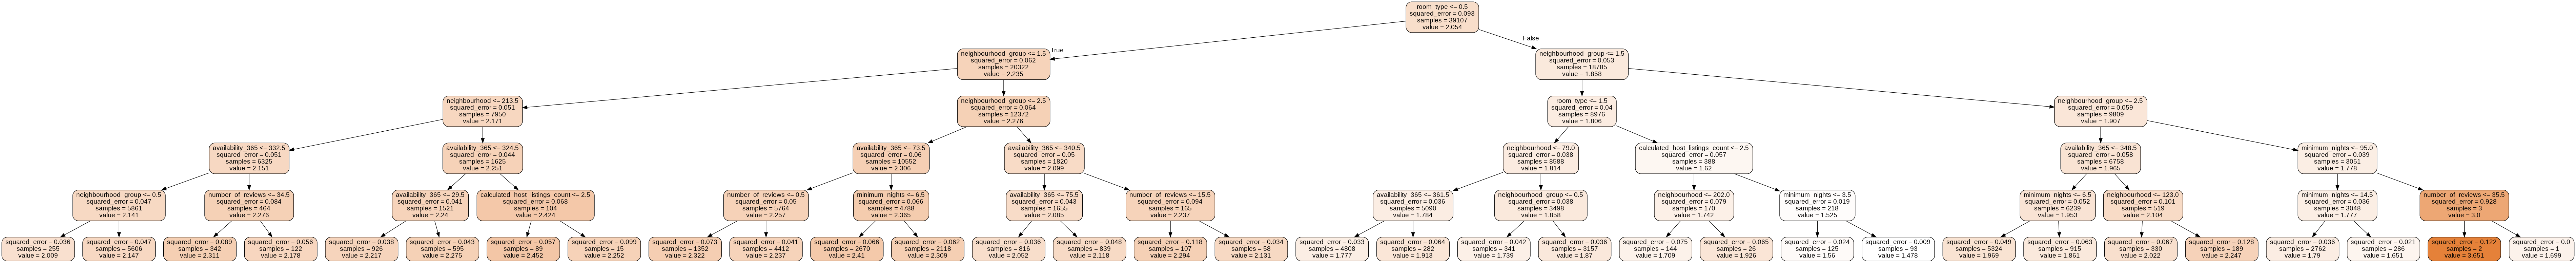

In [177]:
# Create decision tree
with open("tree1.dot", 'w') as f:
     f = export_graphviz(Reg_tree,
                              out_file=f,
                              max_depth = 5,
                              impurity = True,
                              feature_names = ['neighbourhood_group','neighbourhood','room_type','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365'],
                              rounded = True,
                              filled= True )
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('tree-out.png')
PImage('tree-out.png')

### 3. Bayesian Regression

In [178]:
# Bayesian Regression
br = BayesianRidge()

# Fit the model
br.fit(X_train, y_train)

# Prediction
y_predict_br=br.predict(X_test)

# Metrics calculation
bayesian_mse = np.sqrt(metrics.mean_squared_error(y_test, y_predict_br))
bayesian_r2 = r2_score(y_test,y_predict_br) * 100
bayesian_mae = mean_absolute_error(y_test,y_predict_br)


print('''
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     '''.format(
        bayesian_mse, bayesian_r2, bayesian_mae))


        Mean Squared Error: 0.22923027129390505
        R2 Score: 40.583311517778206
        Mean Absolute Error: 0.17054374649977116
     


### 4. Ridge Regression (Linear Model)

In [181]:
# Ridge Model
ridge_model = linear_model.Ridge(alpha = 0.01)

# Fit the model
ridge_model.fit(X_train, y_train)     

# Prediction
y_predict_ridge = ridge_model.predict(X_test) 

# Metric calculation
ridge_mse = np.sqrt(metrics.mean_squared_error(y_test, y_predict_ridge))
ridge_r2 = r2_score(y_test,y_predict_ridge) * 100
ridge_mae = mean_absolute_error(y_test,y_predict_ridge)


print('''
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     '''.format(
        ridge_mse, ridge_r2, ridge_mae))


        Mean Squared Error: 0.22923118013962757
        R2 Score: 40.5828403696186
        Mean Absolute Error: 0.17054384263579736
     


### 5. Lasso Regression (Linear Model)

In [182]:
# Lasso Model
Lasso_model = linear_model.Lasso(alpha = 0.001)

# Fit the model
Lasso_model.fit(X_train, y_train)

# Prediction
y_predict_lasso = Lasso_model.predict(X_test) 

# Metrics calculation
lasso_mse = np.sqrt(metrics.mean_squared_error(y_test, y_predict_lasso))
lasso_r2 = r2_score(y_test,y_predict_lasso) * 100
lasso_mae = mean_absolute_error(y_test,y_predict_lasso)

print('''
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     '''.format(
        lasso_mse, lasso_r2, lasso_mae))


        Mean Squared Error: 0.2292183987102916
        R2 Score: 40.58946612667701
        Mean Absolute Error: 0.17058334146044063
     


### 6. Gradient Boosting Regression

In [192]:
X_test.shape

(9777, 7)

In [194]:
xgb_pred.shape

(9777,)

In [183]:
# Gradient Boost Regressor
xgb = xgboost.XGBRegressor(n_estimators=200, learning_rate=0.1, objective='reg:squarederror')

# Fit the model
xgb.fit(X_train, y_train)

# Prediction
xgb_pred = xgb.predict(X_test)

# Metric Calculation
xgb_mse = np.sqrt(metrics.mean_squared_error(y_test,xgb_pred))
xgb_r2 = r2_score(y_test,xgb_pred) * 100
xgb_mae = mean_absolute_error(y_test,xgb_pred)


print('''
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     '''.format(
       xgb_mse, xgb_r2, xgb_mae))



        Mean Squared Error: 0.19429034092842262
        R2 Score: 57.31582152222383
        Mean Absolute Error: 0.1407124843581022
     


# Model Comparision

Compare all the six model in a table format for comparison.

In [172]:
table = [['Linear Regression','0.22','40.58','0.17'],
         ['Decision Tree','0.21','48.20','0.15'],
         ['Bayesian Regression','0.22','40.58','0.17'],
         ['Ridge Regression','0.22','40.58','0.17'],
         ['Lasso Regression','0.22','40.58','0.17'],
         ['Gradient Boosting Regression','0.19','57.31','0.14']]

print(tabulate(table, headers=['Model','Mean Squared Error','R2 Score','Mean Absolute Error'], tablefmt='presto'))

 Model                        |   Mean Squared Error |   R2 Score |   Mean Absolute Error
------------------------------+----------------------+------------+-----------------------
 Linear Regression            |                 0.22 |      40.58 |                  0.17
 Decision Tree                |                 0.21 |      48.2  |                  0.15
 Bayesian Regression          |                 0.22 |      40.58 |                  0.17
 Ridge Regression             |                 0.22 |      40.58 |                  0.17
 Lasso Regression             |                 0.22 |      40.58 |                  0.17
 Gradient Boosting Regression |                 0.19 |      57.31 |                  0.14


**We can see that Gradient Boosting Regression model has the highest R2 score value and least error. Hence it is the best model for our airbnb project.**

# Metrics Comparision Plots

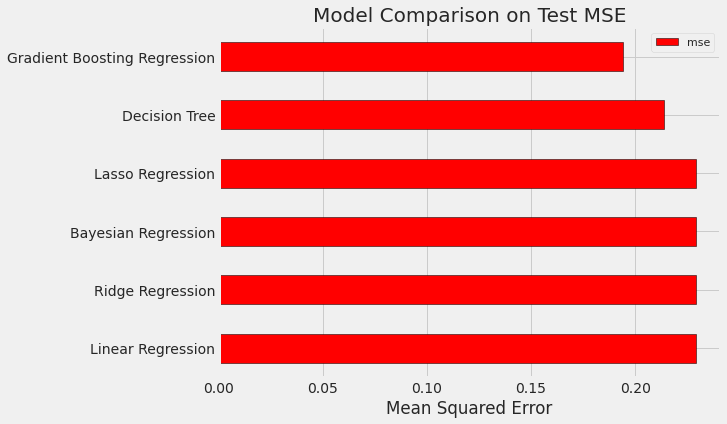

In [186]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Decision Tree', 'Bayesian Regression',
                                           'Ridge Regression', 'Lasso Regression','Gradient Boosting Regression'],
                                 'mse': [linear_mse, tree_mse, bayesian_mse, ridge_mse, 
                                         lasso_mse, xgb_mse]})

# Horizontal bar chart of test mse
model_comparison.sort_values('mse', ascending = False).plot(x = 'model', y = 'mse', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Squared Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MSE', size = 20);

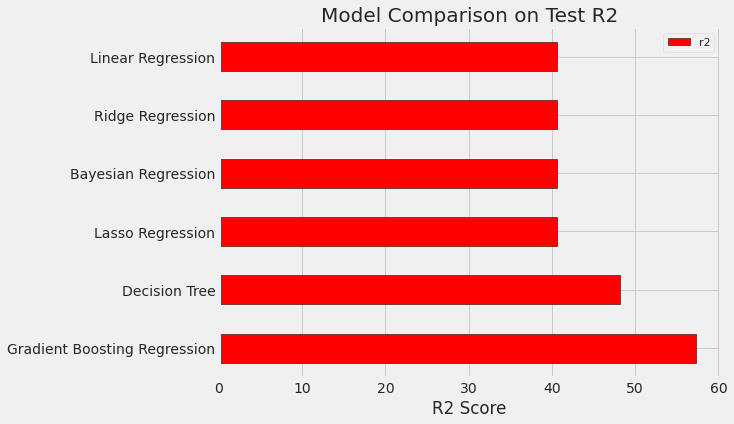

In [188]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Decision Tree','Bayesian Regression',
                                           'Ridge Regression', 'Lasso Regression','Gradient Boosting Regression'],
                                 'r2': [linear_r2, tree_r2, bayesian_r2, ridge_r2, 
                                         lasso_r2, xgb_r2]})

# Horizontal bar chart of test R2
model_comparison.sort_values('r2', ascending = False).plot(x = 'model', y = 'r2', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('R2 Score'); plt.xticks(size = 14)
plt.title('Model Comparison on Test R2', size = 20);

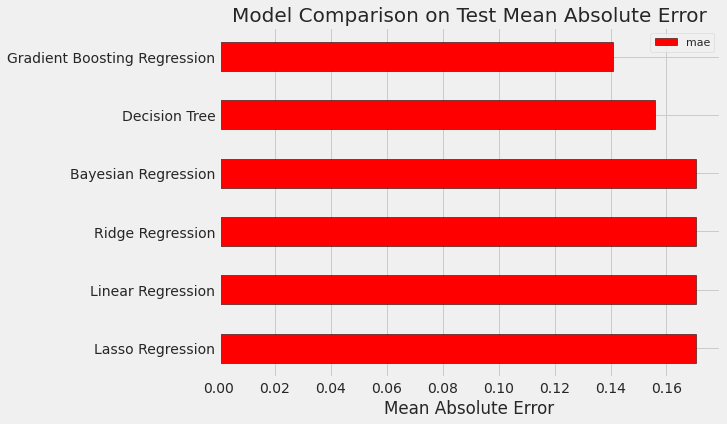

In [189]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Decision Tree','Bayesian Regression',
                                           'Ridge Regression', 'Lasso Regression','Gradient Boosting Regression'],
                                 'mae': [linear_mae, tree_mae, bayesian_mae, ridge_mae, 
                                         lasso_mae, xgb_mae]})

# Horizontal bar chart of test MAE
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test Mean Absolute Error', size = 20);

# Conclusion

In this section, we developed and compared six machine-learning model metrics with plots including mean squared error, r2 score and mean absolute error. 


- We can see that the Gradient Boosting Regression model has the highest R2 score value and the least error. Hence it is the best model for our Airbnb project.
- The advanced models, which include bayesian regression, and gradient boosting all show significant improvements.
- XGB Gradient Boosting regression model has the best performance.